This practice followed the blog: https://becominghuman.ai/neural-networks-for-solving-differential-equations-fa230ac5e04c

and the relevant paper:
https://arxiv.org/pdf/physics/9705023.pdf

In [2]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr

from autograd.core import primitive

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
nx = 10
dx = 1. / nx

In [4]:
def A(x):
    '''
        Left part of initial equation
    '''
    return x + (1. + 3.*x**2) / (1. + x + x**3)


def B(x):
    '''
        Right part of initial equation
    '''
    return x**3 + 2.*x + x**2 * ((1. + 3.*x**2) / (1. + x + x**3))


def f(x, psy):
    '''
        d(psy)/dx = f(x, psy)
        This is f() function on the right
    '''
    return B(x) - psy * A(x)


def psy_analytic(x):
    '''
        Analytical solution of current problem
    '''
    return (np.exp((-x**2)/2.)) / (1. + x + x**3) + x**2

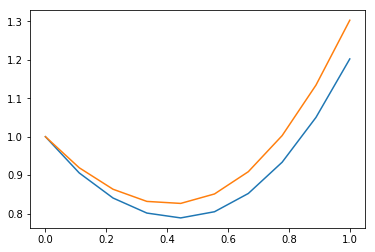

In [11]:
x_space = np.linspace(0, 1, nx) 

# Analytic solution
y_space = psy_analytic(x_space)
psy_fd = np.zeros_like(y_space)
psy_fd[0] = 1.

# Numerical solution
for i in range(1, len(x_space)):
    psy_fd[i] = psy_fd[i-1] + B(x_space[i]) * dx - psy_fd[i-1] * A(x_space[i]) * dx
    
plt.figure()
plt.plot(x_space, y_space) 
plt.plot(x_space, psy_fd)
plt.show()

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))


def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def d_neural_network_dx(W, x, k=1):
    return np.dot(np.dot(W[1].T, W[0].T**k), sigmoid_grad(x))

In [22]:
# Test
# W = [npr.randn(1, 10), npr.randn(10, 1)]


# for xi in x_space:
#     net_out = neural_network(W, xi)[0][0]
#     print(net_out)

0.0635552986388517
0.13742748841090843
0.21038856352767668
0.28161446175256044
0.35043451641052054
0.4163645443370504
0.4791058939050459
0.5385192390889346
0.5945859193179471
0.6473683105802438


In [23]:
def loss_function(W, x):
    loss_sum = 0.
    for xi in x:
        net_out = neural_network(W, xi)[0][0]
        psy_t = 1. + xi * net_out
        d_net_out = d_neural_network_dx(W, xi)[0][0]
        d_psy_t = net_out + xi * d_net_out
        func = f(xi, psy_t)       
        err_sqr = (d_psy_t - func)**2

        loss_sum += err_sqr
    return loss_sum

In [24]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

# x = np.array(1)
# print neural_network(W, x)
# print d_neural_network_dx(W, x)

for i in range(1000):
    loss_grad =  grad(loss_function)(W, x_space)
    
#     print loss_grad[0].shape, W[0].shape
#     print loss_grad[1].shape, W[1].shape
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]
    
    if i%100 == 0:
        print(loss_function(W, x_space))

203.5728035064318
2.219972676737418
0.5964632605969163
0.19825502789985827
0.10188048119097945
0.07830362585308023
0.07205482678189305
0.0699069185489789
0.06873290182713951
0.06779690503168366


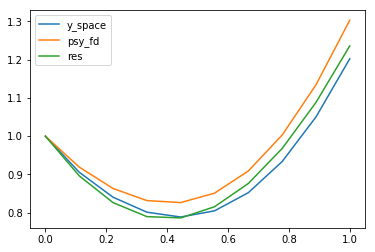

In [31]:
# solution from NN

res = [1 + xi * neural_network(W, xi)[0][0] for xi in x_space] 

plt.figure()
plt.plot(x_space, y_space, label='y_space') 
plt.plot(x_space, psy_fd, label='psy_fd')
plt.plot(x_space, res, label='res')
plt.legend()
plt.show()